# Phase Gradient QFT

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `QFTPhaseGradient`
QFT implemented using coherent addition into a phase gradient register

 A variant of the Quantum Fourier Transform (QFT) that utilizes an additional register provided
 in a phase gradient state to switch controlled rotations to coherent additions. Given an
 ancilla register prepared in the state
$$
    \frac{1}{\sqrt{2^{n}}} \sum_{k=0}^{2^{n} - 1} \omega_{n}^{-k} |k\rangle,
$$
then coherent addition from the system into the ancilla applies the same phase that the
controlled rotation in textbook QFT does. This reduces the number of T-gates to $O(n^2)$
and requires no additional arbitrary rotations beyond the one time ancilla preparation cost.

The size of the ancilla register is important, if the ancilla has less
qubits than the system register then the accuracy of the QFT applied will be
reduced. This implementation assumes an ancilla with `bitsize` qubits. See `ApproximateQFT` for
an implementation or the linked reference for details.

#### Parameters
 - `bitsize`: Size of input register to apply QFT on.
 - `with_reverse`: Whether or not to include the swaps at the end of the circuit decomposition that reverse the order of the qubits. If True, the swaps are inserted. Defaults to True. These are technically necessary in order to perform the correct effect, but can almost always be optimized away by just performing later operations on different qubits. 

#### Registers
 - `q`: The register to perform the QFT on.
 - `phase_grad`: An ancilla register assumed to be prepared in a phase gradient state. See `qualtran/bloqs/rotations/phase_gradient` for more information on how to prepare these states. 

Costs:
    Qubits: Requires $2n$ qubits, $n$ for the register the QFT is performed on and $n$ for the
        phase gradient ancilla. No additional qubits are allocated.
    T gates: $O(n^2)$, based on the approximation for `PlusEqualsProduct`

#### References
 - [Turning Gradients into Additions into QFTs](https://algassert.com/post/1620). 


In [2]:
from qualtran.bloqs.qft import QFTPhaseGradient

### Example Instances

In [3]:
qft_phase_gradient_small = QFTPhaseGradient(3)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([qft_phase_gradient_small],
           ['`qft_phase_gradient_small`'])

### Call Graph

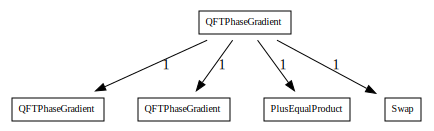

#### Counts totals:
 - `PlusEqualProduct`: 1
 - `QFTPhaseGradient`: 1
 - `QFTPhaseGradient`: 1
 - `Swap`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
qft_phase_gradient_small_g, qft_phase_gradient_small_sigma = qft_phase_gradient_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(qft_phase_gradient_small_g)
show_counts_sigma(qft_phase_gradient_small_sigma)